In [2]:
import pandas as pd
import numpy as np

# Load the datasets
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Display basic information about the datasets
print("Training Data Info:")
print(train_data.info())
print("\nTest Data Info:")
print(test_data.info())

# Display the first few rows of each dataset to understand their structure
print("\nTraining Data Head:")
print(train_data.head())
print("\nTest Data Head:")
print(test_data.head())

# Handle missing values
# For numerical columns, we can fill missing values with the mean or median
train_data['LoanAmount'].fillna(train_data['LoanAmount'].mean(), inplace=True)
train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].median(), inplace=True)
train_data['Credit_History'].fillna(train_data['Credit_History'].mode()[0], inplace=True)

test_data['LoanAmount'].fillna(test_data['LoanAmount'].mean(), inplace=True)
test_data['Loan_Amount_Term'].fillna(test_data['Loan_Amount_Term'].median(), inplace=True)
test_data['Credit_History'].fillna(test_data['Credit_History'].mode()[0], inplace=True)

# For categorical columns, we can fill missing values with the mode
categorical_columns = ['Gender', 'Married', 'Dependents', 'Self_Employed']

for column in categorical_columns:
    train_data[column].fillna(train_data[column].mode()[0], inplace=True)
    test_data[column].fillna(test_data[column].mode()[0], inplace=True)

# Encode categorical variables into numerical values
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for column in ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']:
    train_data[column] = encoder.fit_transform(train_data[column])
    test_data[column] = encoder.transform(test_data[column])

# For 'Dependents', we replace '3+' with 3 and then convert to integer
train_data['Dependents'] = train_data['Dependents'].replace('3+', 3).astype(int)
test_data['Dependents'] = test_data['Dependents'].replace('3+', 3).astype(int)

# Separate the features and the target variable from the training data
X_train = train_data.drop(columns=['Loan_ID', 'Loan_Status'])
y_train = train_data['Loan_Status']

# Encode the target variable 'Loan_Status'
y_train = y_train.map({'Y': 1, 'N': 0})

# Prepare the test data features
X_test = test_data.drop(columns=['Loan_ID'])

# Print the preprocessed data
print("\nPreprocessed Training Features:")
print(X_train.head())
print("\nTraining Labels:")
print(y_train.head())
print("\nPreprocessed Test Features:")
print(X_test.head())

Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None

Test Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 36

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the datasets
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Handle missing values
# For numerical columns, fill missing values with mean or median
train_data['LoanAmount'].fillna(train_data['LoanAmount'].mean(), inplace=True)
train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].median(), inplace=True)
train_data['Credit_History'].fillna(train_data['Credit_History'].mode()[0], inplace=True)

test_data['LoanAmount'].fillna(test_data['LoanAmount'].mean(), inplace=True)
test_data['Loan_Amount_Term'].fillna(test_data['Loan_Amount_Term'].median(), inplace=True)
test_data['Credit_History'].fillna(test_data['Credit_History'].mode()[0], inplace=True)

# For categorical columns, fill missing values with mode
categorical_columns = ['Gender', 'Married', 'Dependents', 'Self_Employed']

for column in categorical_columns:
    train_data[column].fillna(train_data[column].mode()[0], inplace=True)
    test_data[column].fillna(test_data[column].mode()[0], inplace=True)

# Encode categorical variables into numerical values
encoder = LabelEncoder()
for column in ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']:
    train_data[column] = encoder.fit_transform(train_data[column])
    test_data[column] = encoder.transform(test_data[column])

# For 'Dependents', replace '3+' with 3 and convert to integer
train_data['Dependents'] = train_data['Dependents'].replace('3+', 3).astype(int)
test_data['Dependents'] = test_data['Dependents'].replace('3+', 3).astype(int)

# Separate features and target variable from training data
X_train = train_data.drop(columns=['Loan_ID', 'Loan_Status'])
y_train = train_data['Loan_Status'].map({'Y': 1, 'N': 0})

# Prepare test data features
X_test = test_data.drop(columns=['Loan_ID'])


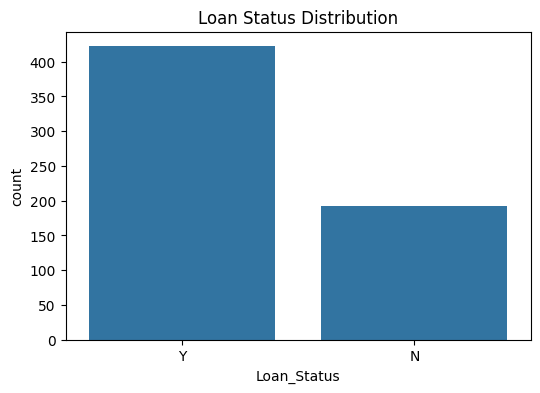

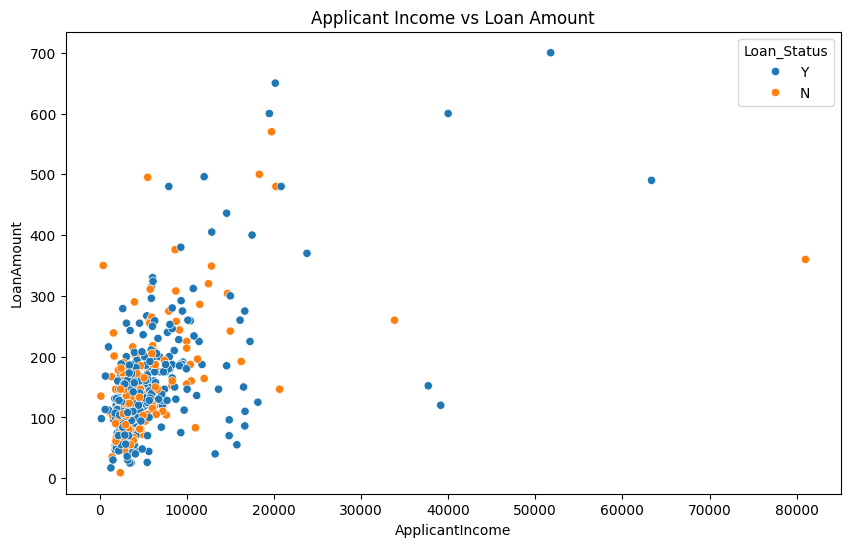

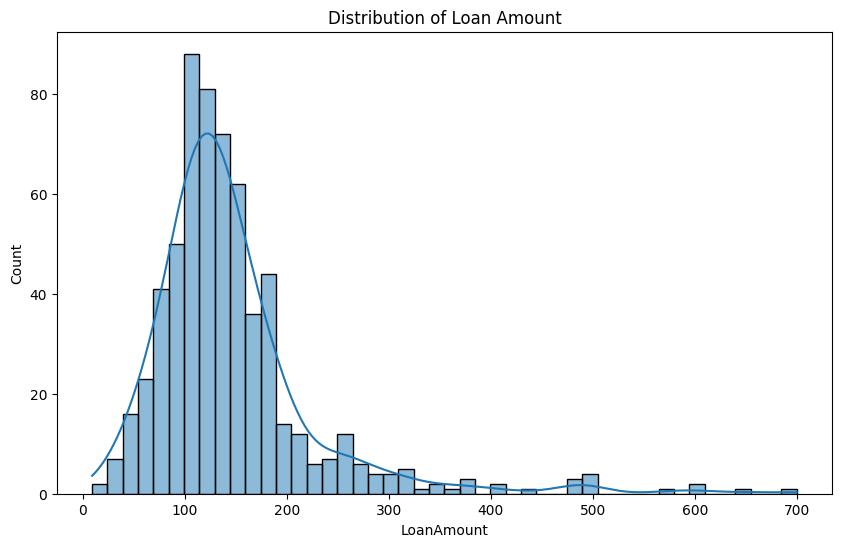

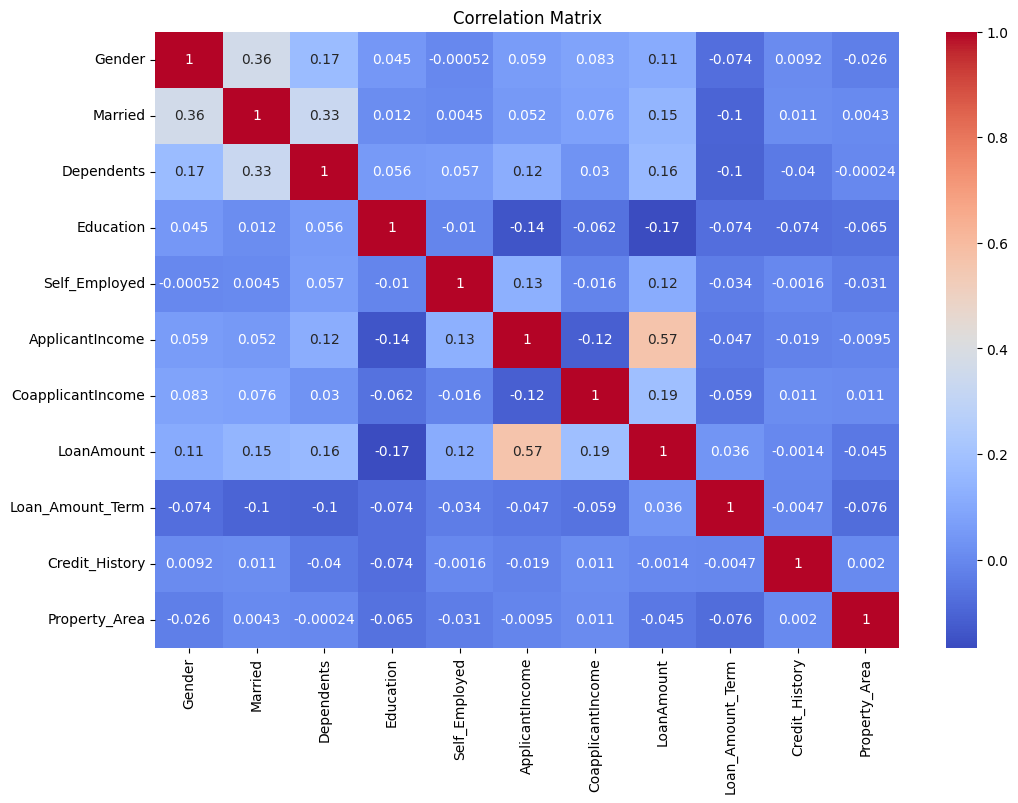

In [7]:
# Visualize distribution of target variable
plt.figure(figsize=(6,4))
sns.countplot(x='Loan_Status', data=train_data)
plt.title('Loan Status Distribution')
plt.show()

# Visualize relationship between ApplicantIncome and LoanAmount
plt.figure(figsize=(10,6))
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', hue='Loan_Status', data=train_data)
plt.title('Applicant Income vs Loan Amount')
plt.show()

# Visualize distribution of LoanAmount
plt.figure(figsize=(10,6))
sns.histplot(train_data['LoanAmount'], kde=True)
plt.title('Distribution of Loan Amount')
plt.show()

# Visualize correlation matrix
plt.figure(figsize=(12,8))
corr_matrix = train_data.select_dtypes(include=['number']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [8]:
# Split the training data into training and validation sets
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Fit a Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_split, y_train_split)

# Predict on the validation set
y_val_pred = model.predict(X_val_split)

# Evaluate the model
accuracy = accuracy_score(y_val_split, y_val_pred)
conf_matrix = confusion_matrix(y_val_split, y_val_pred)
class_report = classification_report(y_val_split, y_val_pred)

print(f'Validation Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

# Predict on the test data
y_test_pred = model.predict(X_test)

# Output predictions
test_data['Loan_Status'] = encoder.inverse_transform(y_test_pred)
print("\nTest Data Predictions:")
print(test_data[['Loan_ID', 'Loan_Status']].head())


Validation Accuracy: 0.79
Confusion Matrix:
[[18 25]
 [ 1 79]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123


Test Data Predictions:
    Loan_ID Loan_Status
0  LP001015   Semiurban
1  LP001022   Semiurban
2  LP001031   Semiurban
3  LP001035   Semiurban
4  LP001051   Semiurban
